**a) Selesaikan semua langkah-langkah disetiap metode yang ada pada modul ini**

#Praktikum 1 : Metode PCA dan LDA
## 1) Principal Component Analysis using the PCA implementation in scikit-learn.

In [ ]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#import dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
TT_df = pd.read_csv('/content/HarryPotterTT.csv')
TT_df

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


In [ ]:
#ekstrak data
y = TT_df.pop('Name').values
X = TT_df.values
X_scal = StandardScaler().fit_transform(X)
X.shape

(22, 5)

In [ ]:
#apply PCA
pcaHP = PCA(n_components=4)
X_r = pcaHP.fit(X_scal).transform(X_scal)
pcaHP.explained_variance_ratio_

array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

In [ ]:
pcaHP.components_

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

(0.0, 0.8)

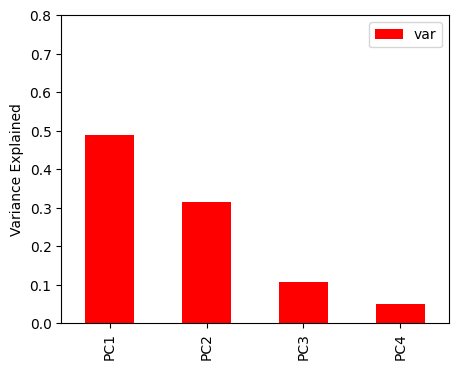

In [ ]:
#plot ke 4 varian PC
df = pd.DataFrame(pcaHP.explained_variance_ratio_,
                  index=['PC1', 'PC2', 'PC3', 'PC4'], columns=['var'])

pl = df.plot.bar(color='red', figsize=(5,4))
pl.set_ylabel("Variance Explained")
pl.set_ylim([0, 0.8])


Kita dapat melihat seberapa besar varians yang dapat dijelaskan oleh setiap komponen utama. PCA digunakan untuk mereduksi dimensi data, dan grafik ini memberikan gambaran tentang seberapa efisien representasi data dalam empat dimensi yang baru. Semakin tinggi batang pada grafik, semakin besar kontribusi komponen utama terhadap variasi dalam data. Plot ini membantu menilai sejauh mana reduksi dimensi dapat mempertahankan sebagian besar informasi dari data asli. Pada kasus ini, PCA menghasilkan empat komponen utama yang menjelaskan sejumlah varians tertentu dari dataset Harry Potter.

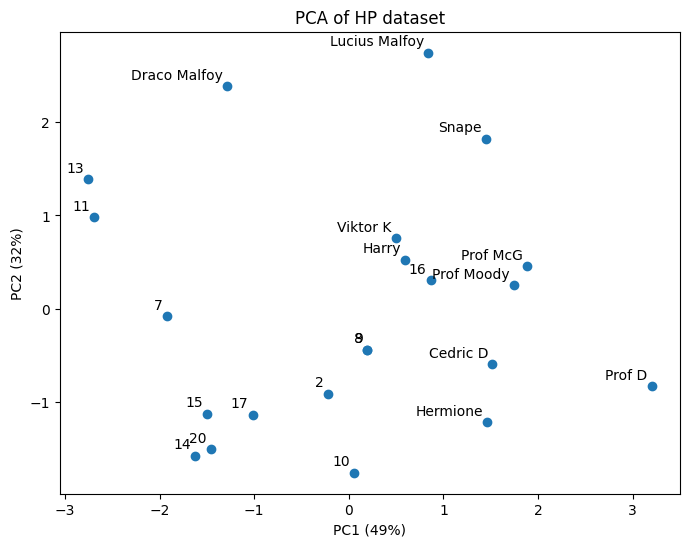

In [ ]:
#plot persebaran data dengan PC1 dan PC2
plt.figure(figsize=(8,6))
lw = 2
labels = list(range(len (y)))
labels[0]='Harry'
labels[1]='Hermione'
labels[3]='Prof D'
labels[5]='Prof McG'
labels[6]='Prof Moody'
labels[18]='Cedric D'
labels[19]='Viktor K'
labels[21]='Lucius Malfoy'
labels[4]='Snape'
labels[12]='Draco Malfoy'
plt.scatter(X_r[:, 0], X_r[:, 1])

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PCA of HP dataset')

plt.show()

Plot tersebut adalah visualisasi dari hasil reduksi dimensi menggunakan PCA (Principal Component Analysis) pada dataset Harry Potter. Pada grafik tersebut, setiap titik merepresentasikan karakter dalam dataset, yang diproyeksikan ke dalam dua dimensi (PC1 dan PC2) setelah penerapan PCA. Setiap karakter diberi label sesuai dengan indeksnya dalam dataset.
Dengan visualisasi ini, kita dapat melihat sebaran karakter-karakter Harry Potter dalam bentuk yang lebih sederhana, meskipun hanya dua dimensi yang digunakan. Plot ini membantu memahami hubungan dan pola antara karakter-karakter tersebut berdasarkan fitur-fitur yang telah direduksi menggunakan PCA.

## 2) Linear Discriminant Analysis using the LDA implementation in scikit-learn.

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import dataset
penguins_df = pd.read_csv('/content/penguins.csv')
y = penguins_df.pop('species').values
X_raw = penguins_df.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=1, test_size=1/2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()


(333, 5)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass
0,0,39.1,18.7,181.0,3750.0
1,1,39.5,17.4,186.0,3800.0
2,2,40.3,18.0,195.0,3250.0
3,3,36.7,19.3,193.0,3450.0
4,4,39.3,20.6,190.0,3650.0


In [ ]:
#menampilkan data y
types = list(Counter(y).keys())
types

['Adelie', 'Gentoo', 'Chinstrap']

In [ ]:
#apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_tr_lda = lda.transform(X_train)
X_tr_lda.shape

(166, 2)

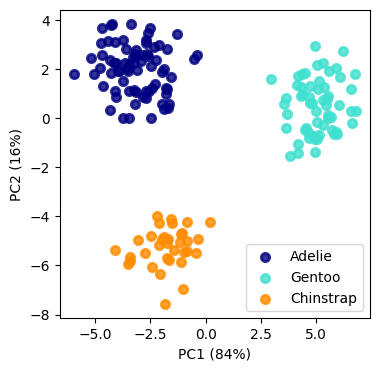

In [ ]:
#plot LDA
plt.figure(figsize=(4,4))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, target_name in zip(colors, types):
    plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
                color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (84%)')
plt.ylabel('PC2 (16%)')

plt.show()

Plot tersebut adalah hasil visualisasi dari LDA (Linear Discriminant Analysis) pada dataset. Setiap titik pada grafik mewakili pengurangan dimensi menggunakan LDA dan merepresentasikan karakter dalam dataset Harry Potter. Grafik ini menggunakan dua dimensi (PC1 dan PC2) yang dihasilkan oleh LDA. Setiap warna mewakili jenis karakter yang berbeda, dan titik-titik yang memiliki warna yang sama menunjukkan karakter-karakter dengan pola yang serupa dalam data yang direduksi.

In [ ]:
#menghitung akurasi
y_pred = lda.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [ ]:
#penggunaan PCA
pca = PCA(n_components=4)
X_tr_pca = pca.fit(X_train).transform(X_train)

pca.explained_variance_ratio_

array([0.6233328 , 0.21906425, 0.10653413, 0.03167549])

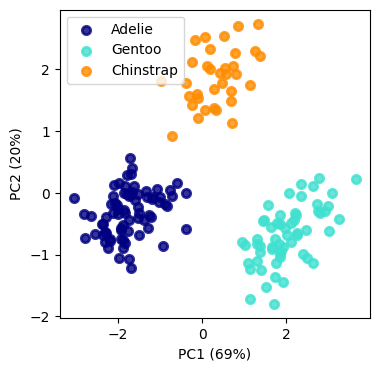

In [ ]:
#membuat plot PCA untuk perbandingan
plt.figure(figsize=(4,4))

lw = 2

for color, target_name in zip(colors, types):
    plt.scatter(X_tr_pca[y_train == target_name, 0], X_tr_pca[y_train == target_name, 1],
                color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (69%)')
plt.ylabel('PC2 (20%)')

plt.show()

Plot diatas menunjukkan hasil visualisasi menggunakan LDA (Linear Discriminant Analysis) dan PCA (Principal Component Analysis) pada dataset Harry Potter. Setiap titik pada grafik merepresentasikan karakter dalam data yang diproyeksikan ke dalam dua dimensi (PC1 dan PC2) setelah menerapkan LDA. Warna titik-titik mencerminkan jenis karakter yang berbeda.

# Praktikum 2 : Metode Filter
## 1) Feature Selection using Filters

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
#import dataset
seg_data = pd.read_csv('/content/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
#menghitung data pada variabel target
seg_data['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [ ]:
#split data
y = seg_data.pop('Class').values
X_raw = seg_data.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=1, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = seg_data.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [ ]:
#feature scores
chi2_score, pval = chi2(X_train, y_train)
shi2_score = np.nan_to_num(chi2_score)
chi2_score
#the chi squares scores for the features

array([ 14.99569813, 114.86161054,          nan,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [ ]:
i_scores = mutual_info_classif(X_train, y_train)
i_scores
#the i-gain scores for the features

array([0.13013992, 0.9450742 , 0.0056676 , 0.        , 0.03030953,
       0.48500756, 0.32117121, 0.45932229, 0.36253556, 1.16144779,
       1.2076821 , 1.10490931, 1.12858931, 0.76544442, 0.92135894,
       0.96102189, 1.13669498, 0.92920558, 1.1378946 ])

In [ ]:
#simpan skor
df=pd.DataFrame({'Mutual Info.':i_scores,'Chi Square':chi2_score,'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.207682,290.963800
INTENSITY-MEAN,1.161448,293.436006
HUE-MEAN,1.137895,268.862214
VALUE-MEAN,1.136695,287.668916
RAWGREEN-MEAN,1.128589,290.117395
RAWBLUE-MEAN,1.104909,303.477831
EXGREEN-MEAN,0.961022,92.917809
REGION-CENTROID-ROW,0.945074,114.861611
SATURATION-MEAN,0.929206,81.646548


ValueError: ignored

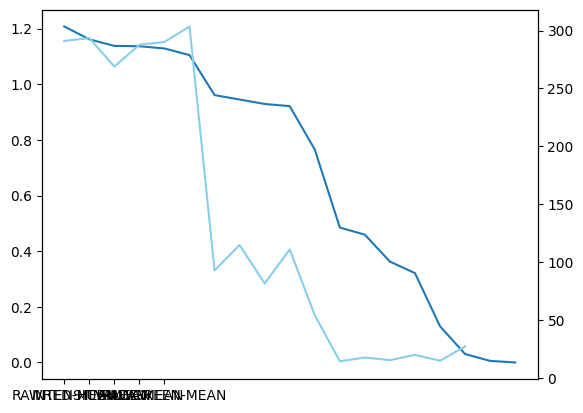

In [ ]:
#plotting the filter score
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
ax2 = ax.twinx()

ax.plot(df.index, df["Mutual Info."], label='I-Gain')
ax2.plot(df.index, df["Chi Square"], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)
ax.set_xticklabels(list(df.index), rotation = 90)

ax.set_xlabel('Feature', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.show()

Grafik memiliki dua sumbu y: satu untuk I-Gain dan satu lagi untuk Chi Squared. Setiap bar mewakili nilai I-Gain dan Chi Squared dari suatu fitur tertentu dalam dataset. Sumbu x menunjukkan nama-nama fitur tersebut.

Grafik ini memungkinkan pembandingan visual antara nilai I-Gain dan Chi Squared untuk setiap fitur. Jika bar I-Gain tinggi, itu menunjukkan bahwa fitur tersebut memberikan informasi yang signifikan terhadap kelas target. Sementara itu, bar Chi Squared yang tinggi menunjukkan adanya ketergantungan statistik antara fitur dan kelas target.

In [ ]:
#hitung korelasi
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=nan, pvalue=nan)

## 2) Correlation Based Feature Selection (CFS)

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
#import CFS
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

### Example 1: CFS on Segmentation dataset

In [ ]:
seg_data = pd.read_csv('/content/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
y = seg_data.pop('Class').values
X_raw = seg_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 0.946
Hold Out testing all features: 0.940


### Forward Search - CFS

In [ ]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.43951449 0.44021037]
Selected Feature index: (17, 18)


In [ ]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN'], dtype='object')

### Evaluate on Test Data

In [ ]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.874
Hold Out testing selected features: 0.847


### Best First Search - CFS

In [ ]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([17, 18,  8,  6, 10,  9])

In [ ]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN', 'HEDGE-SD', 'VEDGE-SD', 'RAWRED-MEAN',
       'INTENSITY-MEAN'],
      dtype='object')

In [ ]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.43951448818147326,
 0.44021037374992716,
 0.43767125770380755,
 0.43619307358905546,
 0.43539938594841915,
 0.4339188253042891]

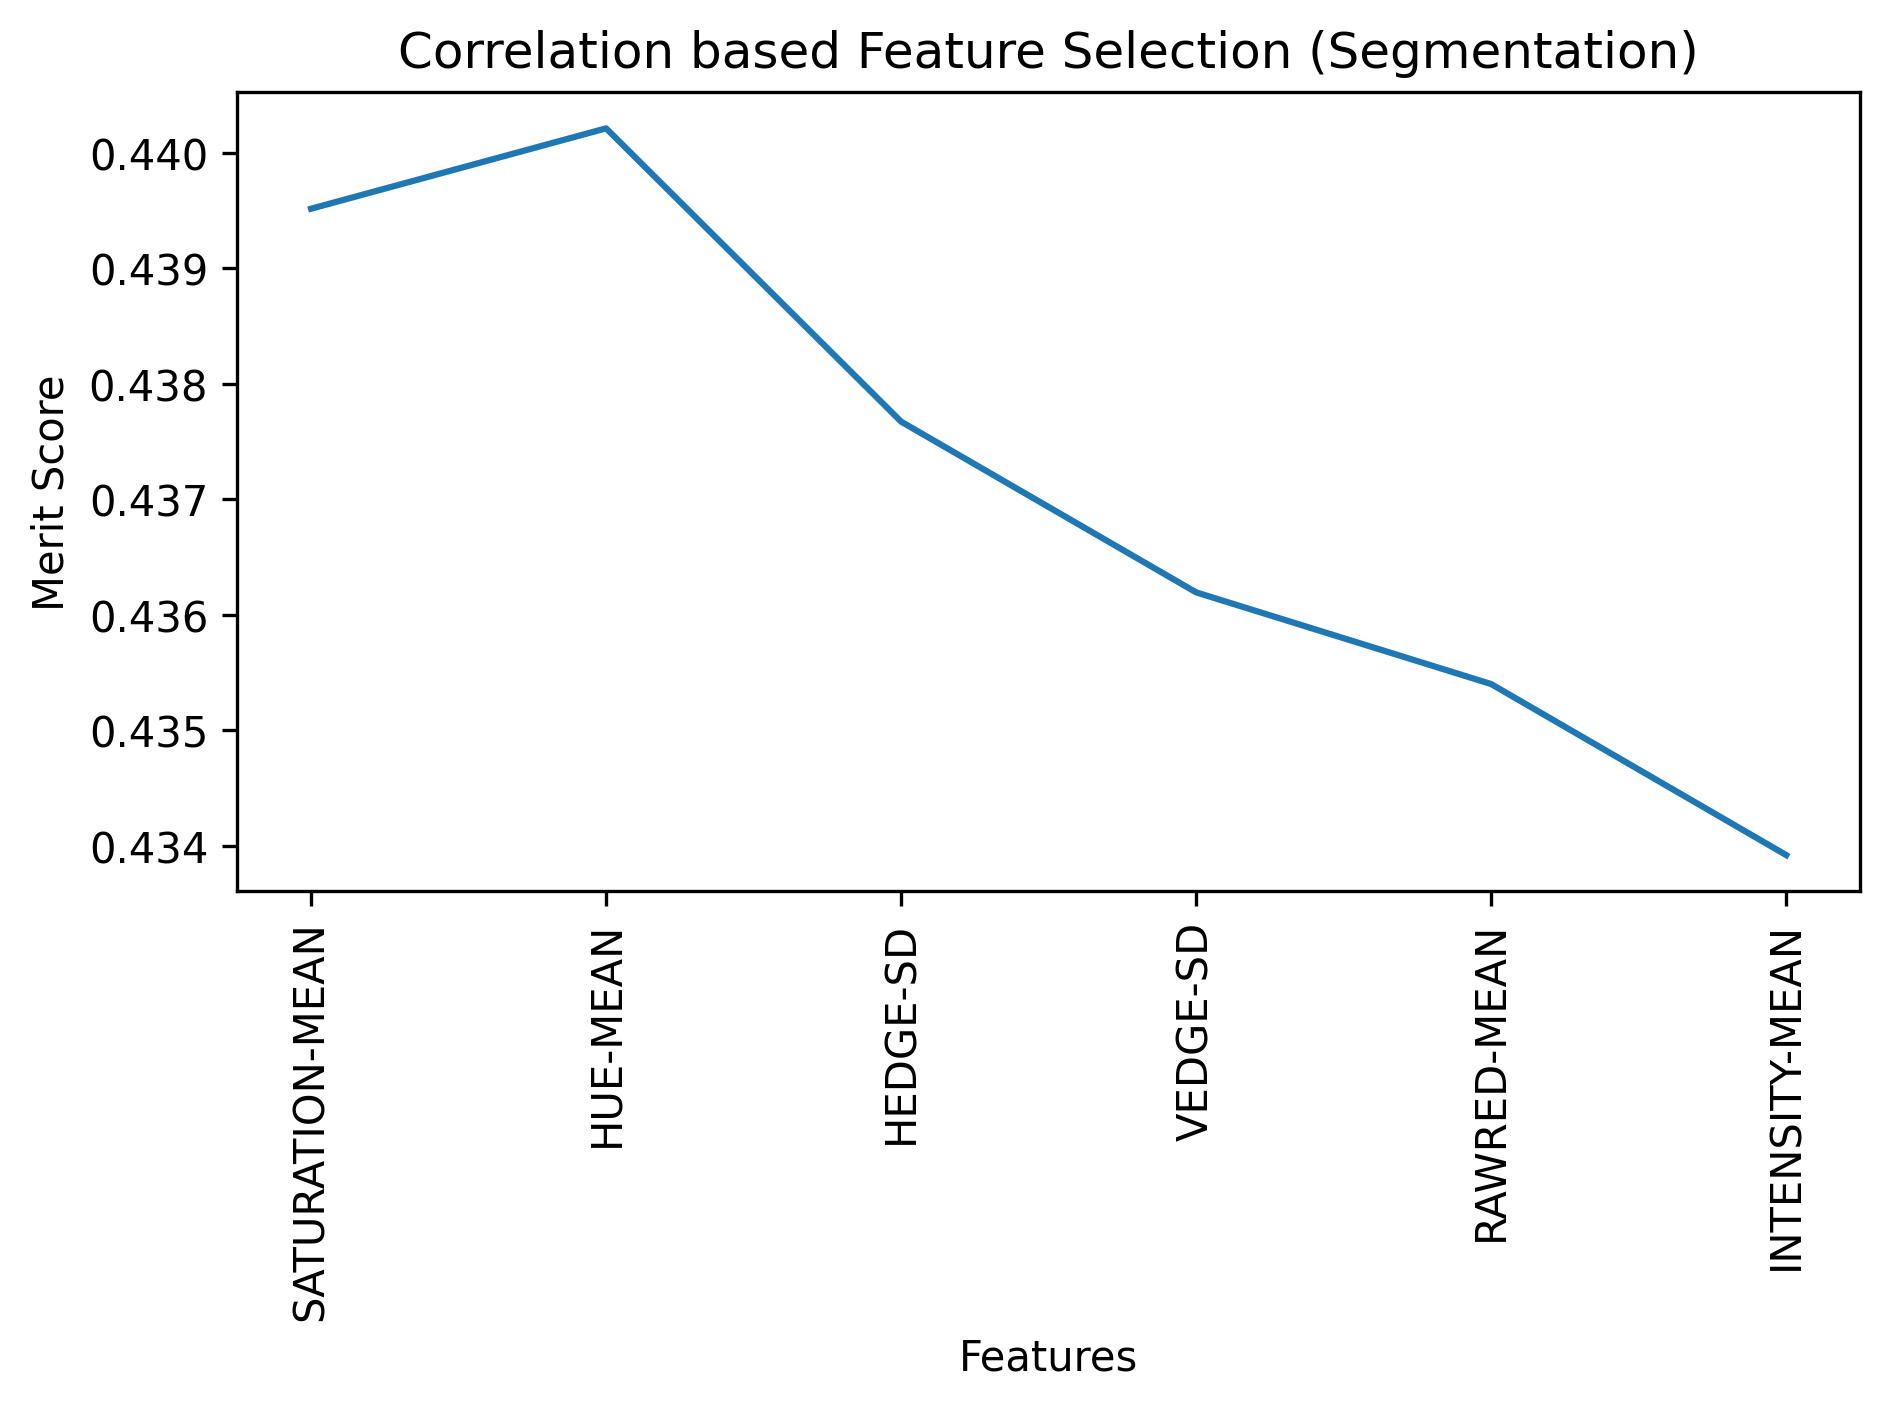

In [ ]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Segmentation)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

Plot tersebut adalah hasil visualisasi dari proses seleksi fitur berbasis korelasi (Correlation-based Feature Selection) pada dataset segmentasi. Dalam plot ini, sumbu x menunjukkan nama-nama fitur yang dipilih melalui seleksi, sedangkan sumbu y menunjukkan skor merit untuk setiap fitur. Skor merit mencerminkan seberapa baik fitur-fitur tersebut mempengaruhi hasil prediksi model kNN.
Fitur-fitur dengan skor merit tinggi adalah kandidat terbaik untuk dimasukkan ke dalam model akhir, sementara fitur-fitur dengan skor merit rendah mungkin tidak memberikan kontribusi yang signifikan dan dapat diabaikan dalam proses pengembangan model.

### Evaluate on test data

In [ ]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 0.900
Hold Out testing selected features: 0.887


### Plot Results

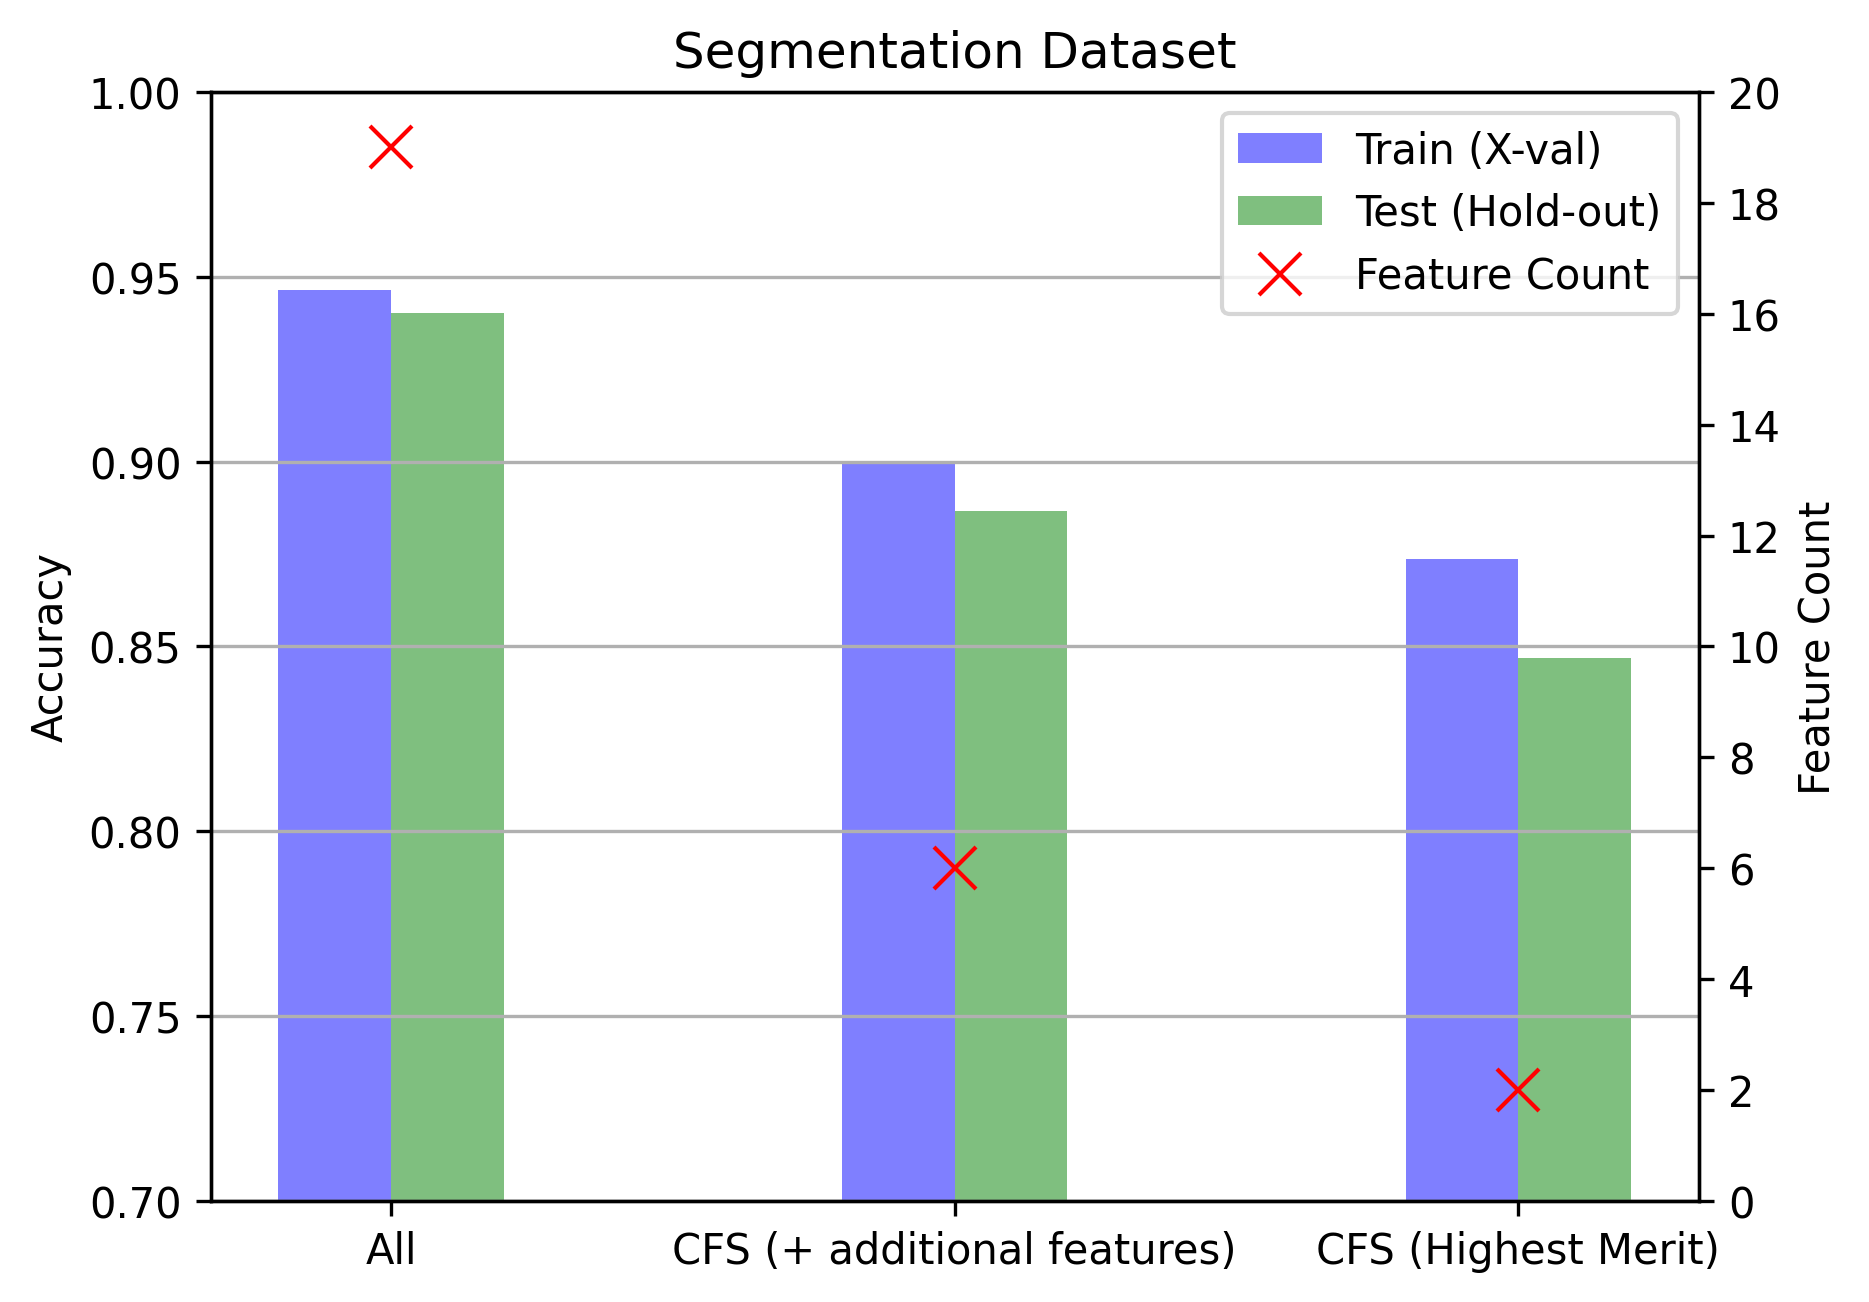

In [ ]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Segmentation Dataset")
plt.show()

Plot diatas merupakan visualisasi hasil evaluasi performa model dengan mempertimbangkan tiga metode seleksi fitur yang berbeda (All, CFS (+ additional features), CFS (Highest Merit)) pada dataset segmentasi. Plot ini menunjukkan akurasi pada data latih (X-val) dan data uji (Hold-out) untuk setiap metode seleksi fitur, serta jumlah fitur yang digunakan oleh model.

# Praktikum 3 : Metode Embedded (D-Tree)

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
#import dataset
penguins_df = pd.read_csv('penguins.csv', index_col = 0)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()

(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
#hitung data pada variabel target
penguins_df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
y = penguins_df.pop('species').values
X = penguins_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       random_state=1, test_size=1/2)

feature_names = penguins_df.columns
X_train.shape, X_test.shape

((166, 4), (167, 4))

In [ ]:
#tree with no pruning (full tree)
#tampilkan nilai akurasi
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.93


[Text(0.6, 0.9, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.7, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.3, 0.5, 'bill_depth <= 16.65\n75\n[74, 1, 0]\nAdelie'),
 Text(0.2, 0.3, 'bill_length <= 39.5\n8\n[7, 1, 0]\nAdelie'),
 Text(0.1, 0.1, '7\n[7, 0, 0]\nAdelie'),
 Text(0.3, 0.1, '1\n[0, 1, 0]\nGentoo'),
 Text(0.4, 0.3, '67\n[67, 0, 0]\nAdelie'),
 Text(0.5, 0.5, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.7, 'bill_depth <= 18.4\n63\n[0, 5, 58]\nChinstrap'),
 Text(0.7, 0.5, '58\n[0, 0, 58]\nChinstrap'),
 Text(0.9, 0.5, '5\n[0, 5, 0]\nGentoo')]

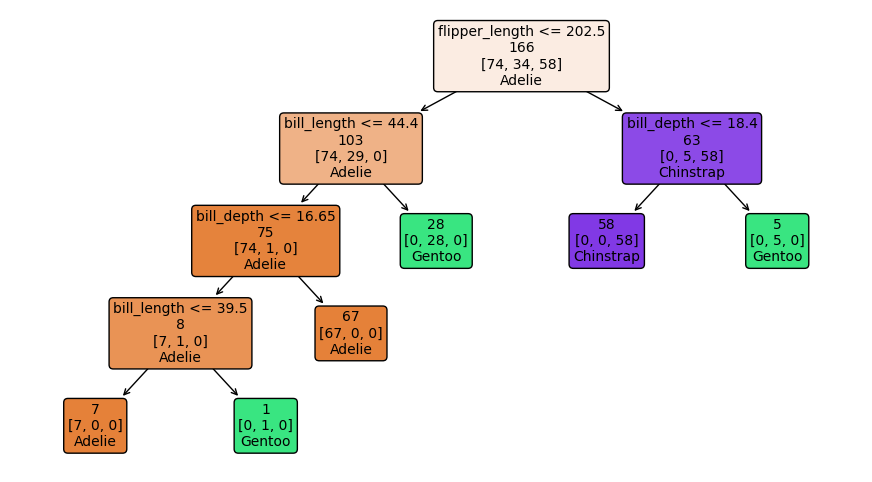

In [ ]:
#plot D-Tree
plt.figure(figsize=(11,6))

tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
               class_names=['Adelie', 'Gentoo', 'Chinstrap'],
               label = 'none', filled=True, impurity = False,
               rounded=True)

Plot tersebut adalah visualisasi dari struktur pohon keputusan (Decision Tree). Pohon keputusan adalah model prediktif yang memetakan fitur-fitur dari data ke keputusan-keputusan yang mengarah ke kelas target. kelas targetnya kali ini yaitu jenis-jenis penguin pada dataset.
Melalui pohon keputusan ini, kita dapat melihat aturan-aturan keputusan yang digunakan oleh model dalam memprediksi jenis-jenis penguin. Setiap percabangan mewakili suatu kondisi yang dipertimbangkan oleh model, dan setiap daun mewakili hasil prediksi yang diberikan oleh model untuk suatu kombinasi fitur tertentu.

In [ ]:
#tampilkan fitur penting
fi = ftree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
    print("%4.2f %s" % (fi_val, f_name))

0.34 bill_length
0.11 bill_depth
0.55 flipper_length
0.00 body_mass


In [ ]:
ftree.get_n_leaves()

6

In [ ]:
#pruned tree
#tampilkan nilai akurasi
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes =3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.89


[Text(0.6, 0.8333333333333334, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.5, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.2, 0.16666666666666666, '75\n[74, 1, 0]\nAdelie'),
 Text(0.6, 0.16666666666666666, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.5, '63\n[0, 5, 58]\nChinstrap')]

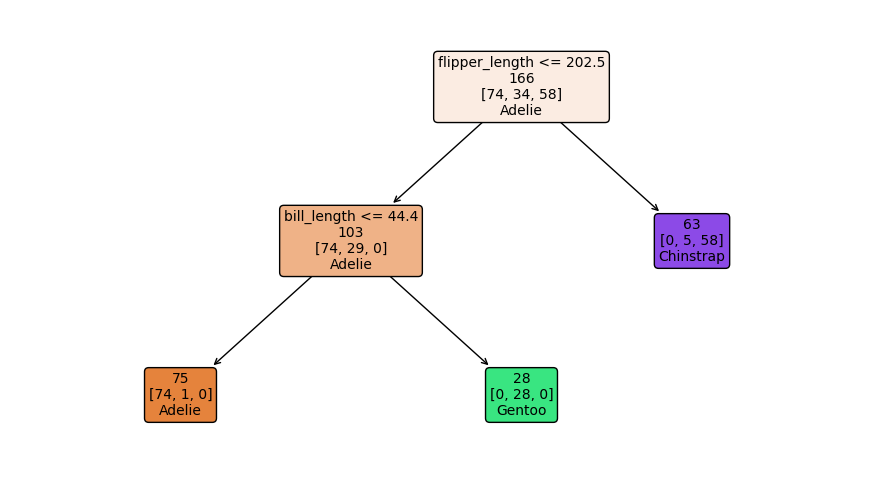

In [ ]:
#plot D-Tree
plt.figure(figsize=(11,6))

tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
               class_names=['Adelie', 'Gentoo', 'Chinstrap'],
               label = 'none', filled=True, impurity = False,
               rounded=True)

Plot tersebut merupakan visualisasi dari struktur pohon keputusan (Decision Tree).  Pohon keputusan adalah model prediktif yang memetakan fitur-fitur dari data ke keputusan-keputusan yang mengarah ke kelas target. Dalam kasus ini, kelas targetnya mungkin adalah 'Adelie', 'Gentoo', atau 'Chinstrap'. Melalui pohon keputusan ini kita dapat melihat aturan-aturan keputusan yang digunakan oleh model dalam memprediksi jenis-jenis penguin. Setiap percabangan mewakili suatu kondisi yang dipertimbangkan oleh model, dan setiap daun mewakili hasil prediksi yang diberikan oleh model untuk suatu kombinasi fitur tertentu.

In [ ]:
#tampilkan fitur penting
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print("%4.2f %s" %(fi_val, f_name))

0.37 bill_length
0.00 bill_depth
0.63 flipper_length
0.00 body_mass


#Praktikum 4 : Permutation Feature Importance and Wrapper
## 1) Permutation Feature Importance

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#import dataset
col_heads = [str(x) for x in range(34)]
col_heads.append('Class')
ion_data = pd.read_csv('/content/ionosphere.csv', names = col_heads, na_values='?', header = None)
ion_data.dropna (axis = 0, inplace = True)
print(ion_data.shape)
ion_data.head()

(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
#split data
y = ion_data.pop('Class').values
X = ion_data
ion_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = ion_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

In [ ]:
#final result dataframe
res_df = pd.DataFrame([['All Features',0.0,0.0],
                       ['After PI', 0.0,0.0],
                       ['After Wrapper',0.0,0.0]], columns=['Method','X-Val','Hold-Out'])
res_df.set_index('Method', inplace=True)

In [ ]:
#akurasi
kNN = KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

res_df.loc['All Features']['X-Val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 0.818
Hold Out testing all features: 0.795


### Permutation feature importance stage

In [ ]:
#tampilkan permuation importance
knn_perm = permutation_importance (kNN, X_train, y_train,
                                   n_repeats=10, random_state = 0)


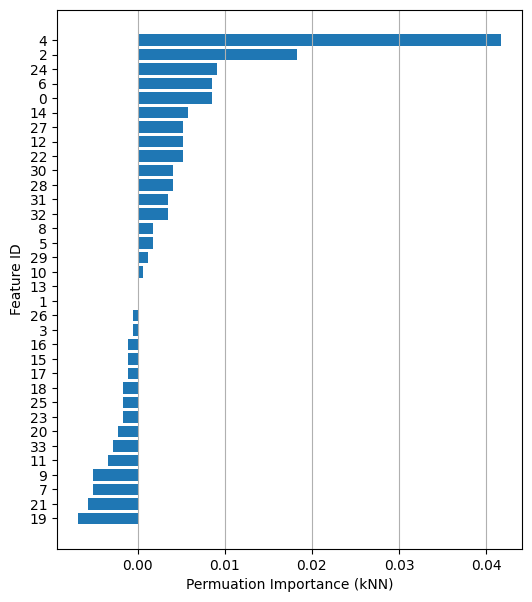

In [ ]:
sorted_idx = knn_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(6, 7))
ax.barh(ion_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel("Feature ID")
ax.set_xlabel("Permuation Importance (kNN)");
ax.figure.savefig("PIscores.png")

Hasil plot diatas adalah memberikan informasi tentang sejauh mana masing-masing fitur mempengaruhi kinerja model kNN. Fitur dengan Permutation Importance yang lebih tinggi akan lebih penting dalam memprediksi output model, sedangkan fitur dengan Permutation Importance yang rendah mungkin tidak memberikan kontribusi signifikan terhadap prediksi. Plot ini membantu dalam pemahaman yang lebih baik tentang mana fitur yang paling berpengaruh dalam model kNN yang digunakan.

In [ ]:
#buat mask
mask = knn_perm.importances_mean[sorted_idx]>0

In [ ]:
PI_features = ion_data.columns[sorted_idx][mask]

In [ ]:
X_PI = X[PI_features]
print("Permutation Importance selects", X_PI.shape[1], "features.")
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled,
                                                                y, random_state=2, test_size=1/2)

Permutation Importance selects 18 features.


In [ ]:
#hitung kembali akurasi
knnPI = KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI.fit(X_PI_train,y_PI_train)

y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI,y_test)
cv_acc_PI = cross_val_score (knnPI, X_PI_train, y_train, cv=8)

res_df.loc['After PI']['X-Val']=cv_acc_PI.mean()
res_df.loc['After PI']['Hold-Out']=acc_PI
print("X_Val on training PI features: {0:.3f}".format(cv_acc_PI.mean()))
print("Hold Out testing PI features: {0:.3f}".format(acc_PI))

X_Val on training PI features: 0.880
Hold Out testing PI features: 0.847


## 2) Wrapper Stage

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction = 'backward',
                                 cv = 10, tol = 0.00001
)

sfs.fit(X_PI_train, y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test = sfs.transform(X_PI_test)


In [ ]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)
knnPIW.score (X_PI_W_test,y_PI_test)

(175, 16)


0.8465909090909091

In [ ]:
#hitung akurasi
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)

y_pred_PIW = knnPIW.predict(X_PI_W_test)
acc_PIW = accuracy_score(y_pred_PIW,y_PI_test)
cv_acc_PIW = cross_val_score (knnPIW, X_PI_W_train, y_train, cv=8)

res_df.loc['After Wrapper']['X-Val']=cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out']=acc_PIW
print("X_Val on training all features: {0:.3f}".format(cv_acc_PIW.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc_PIW))

(175, 16)
X_Val on training all features: 0.897
Hold Out testing all features: 0.847


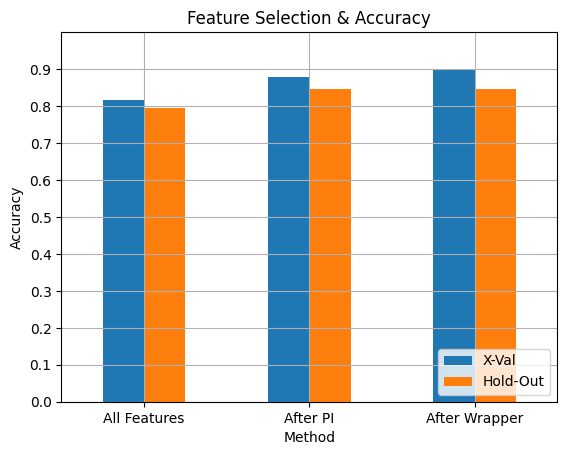

In [ ]:
#plot semua hasil
ax = res_df.plot.bar(rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc='lower right')
ax.grid(True)
ax.figure.savefig("PI+Wrapper.png")

**b). Rangkum hasil dan analisis yang ada pada praktikum 1 dan jelaskan perbedaan kedua metode tersebut yaitu PCA dan LDA!.**

**Kesimpulan:** Perbedaan antara PCA (Principal Component Analysis) dan LDA (Linear Discriminant Analysis) dalam praktikum ini adalah PCA digunakan untuk mengurangi dimensi data dengan fokus pada ekspresi data yang efisien melalui kombinasi linear dari komponen utama. PCA tidak mempertimbangkan kelas atau kelompok data, hanya berfokus pada pengurangan dimensi. PCA adalah tentang pengurangan dimensi tanpa mempertimbangkan kelas

Sementara itu, LDA digunakan untuk mereduksi dimensi data sambil mempertahankan informasi yang relevan untuk pemisahan antar kelas. LDA berusaha memaksimalkan jarak antara rata-rata kelas yang berbeda dan meminimalkan variasi dalam kelas yang sama. Dengan demikian, LDA adalah algoritma yang cocok untuk masalah klasifikasi, di mana tujuannya adalah memisahkan data berdasarkan label atau kelas yang telah diberikan. LDA fokus pada pemisahan kelas saat mereduksi dimensi data. Pemilihan metode tergantung pada tujuan analisis data yang ingin dicapai.


Dari grafik diatas, kita dapat menyimpulkan bahwa metode CFS (Highest Merit) adalah opsi terbaik untuk menjaga performa model yang bagus sambil menggunakan jumlah fitur yang lebih sedikit. Ini merupakan contoh yang baik dari pertukaran (trade-off) antara kompleksitas model (jumlah fitur) dan kinerja model.

Pemilihan fitur yang cerdas sangat penting untuk menghindari masalah overfitting, menghemat waktu komputasi, dan meningkatkan kemampuan menjelaskan model. Dalam situasi ini, menggunakan teknik pemilihan fitur membantu mencapai hasil yang efisien dan mudah dimengerti pada dataset segmentasi.

**Analisis:** PCA mengurangi dimensi data tanpa mempertimbangkan kelas, sedangkan LDA mempertahankan informasi kelas. LDA berfokus pada pemisahan kelas untuk klasifikasi. Metode CFS (Highest Merit) mempertahankan performa dengan fitur yang sedikit. Ini menunjukkan keseimbangan antara kompleksitas dan kinerja model. Pemilihan fitur cerdas menghindari overfitting dan meningkatkan interpretasi. Teknik pemilihan fitur meningkatkan hasil analisis dataset segmentasi.

**c). Dengan dataset penguins.csv gunakan model Filters dan Correlation Based Feature Selection (CFS). Kemudian rangkum hasil dan lakukan analisis!**

In [ ]:
penguins_data = pd.read_csv('/content/penguins.csv')
print(penguins_data.shape)
penguins_data.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
y = penguins_data.pop('species').values
X_raw = penguins_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


### Forward Search - CFS

In [ ]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.34053677 0.34140439]
Selected Feature index: (0, 3)


In [ ]:
# Print the selected features
feature_names_sel = penguins_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['Unnamed: 0', 'flipper_length'], dtype='object')

### Evaluate on Test Data

In [ ]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.988
Hold Out testing selected features: 1.000


### Best First Search - CFS

In [ ]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([0, 3, 1, 2, 4])

In [ ]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['Unnamed: 0', 'flipper_length', 'bill_length', 'bill_depth',
       'body_mass'],
      dtype='object')

In [ ]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.3405367650586217,
 0.34140438602544737,
 0.34135154379629856,
 0.3315979801428004,
 0.3247704646387883]

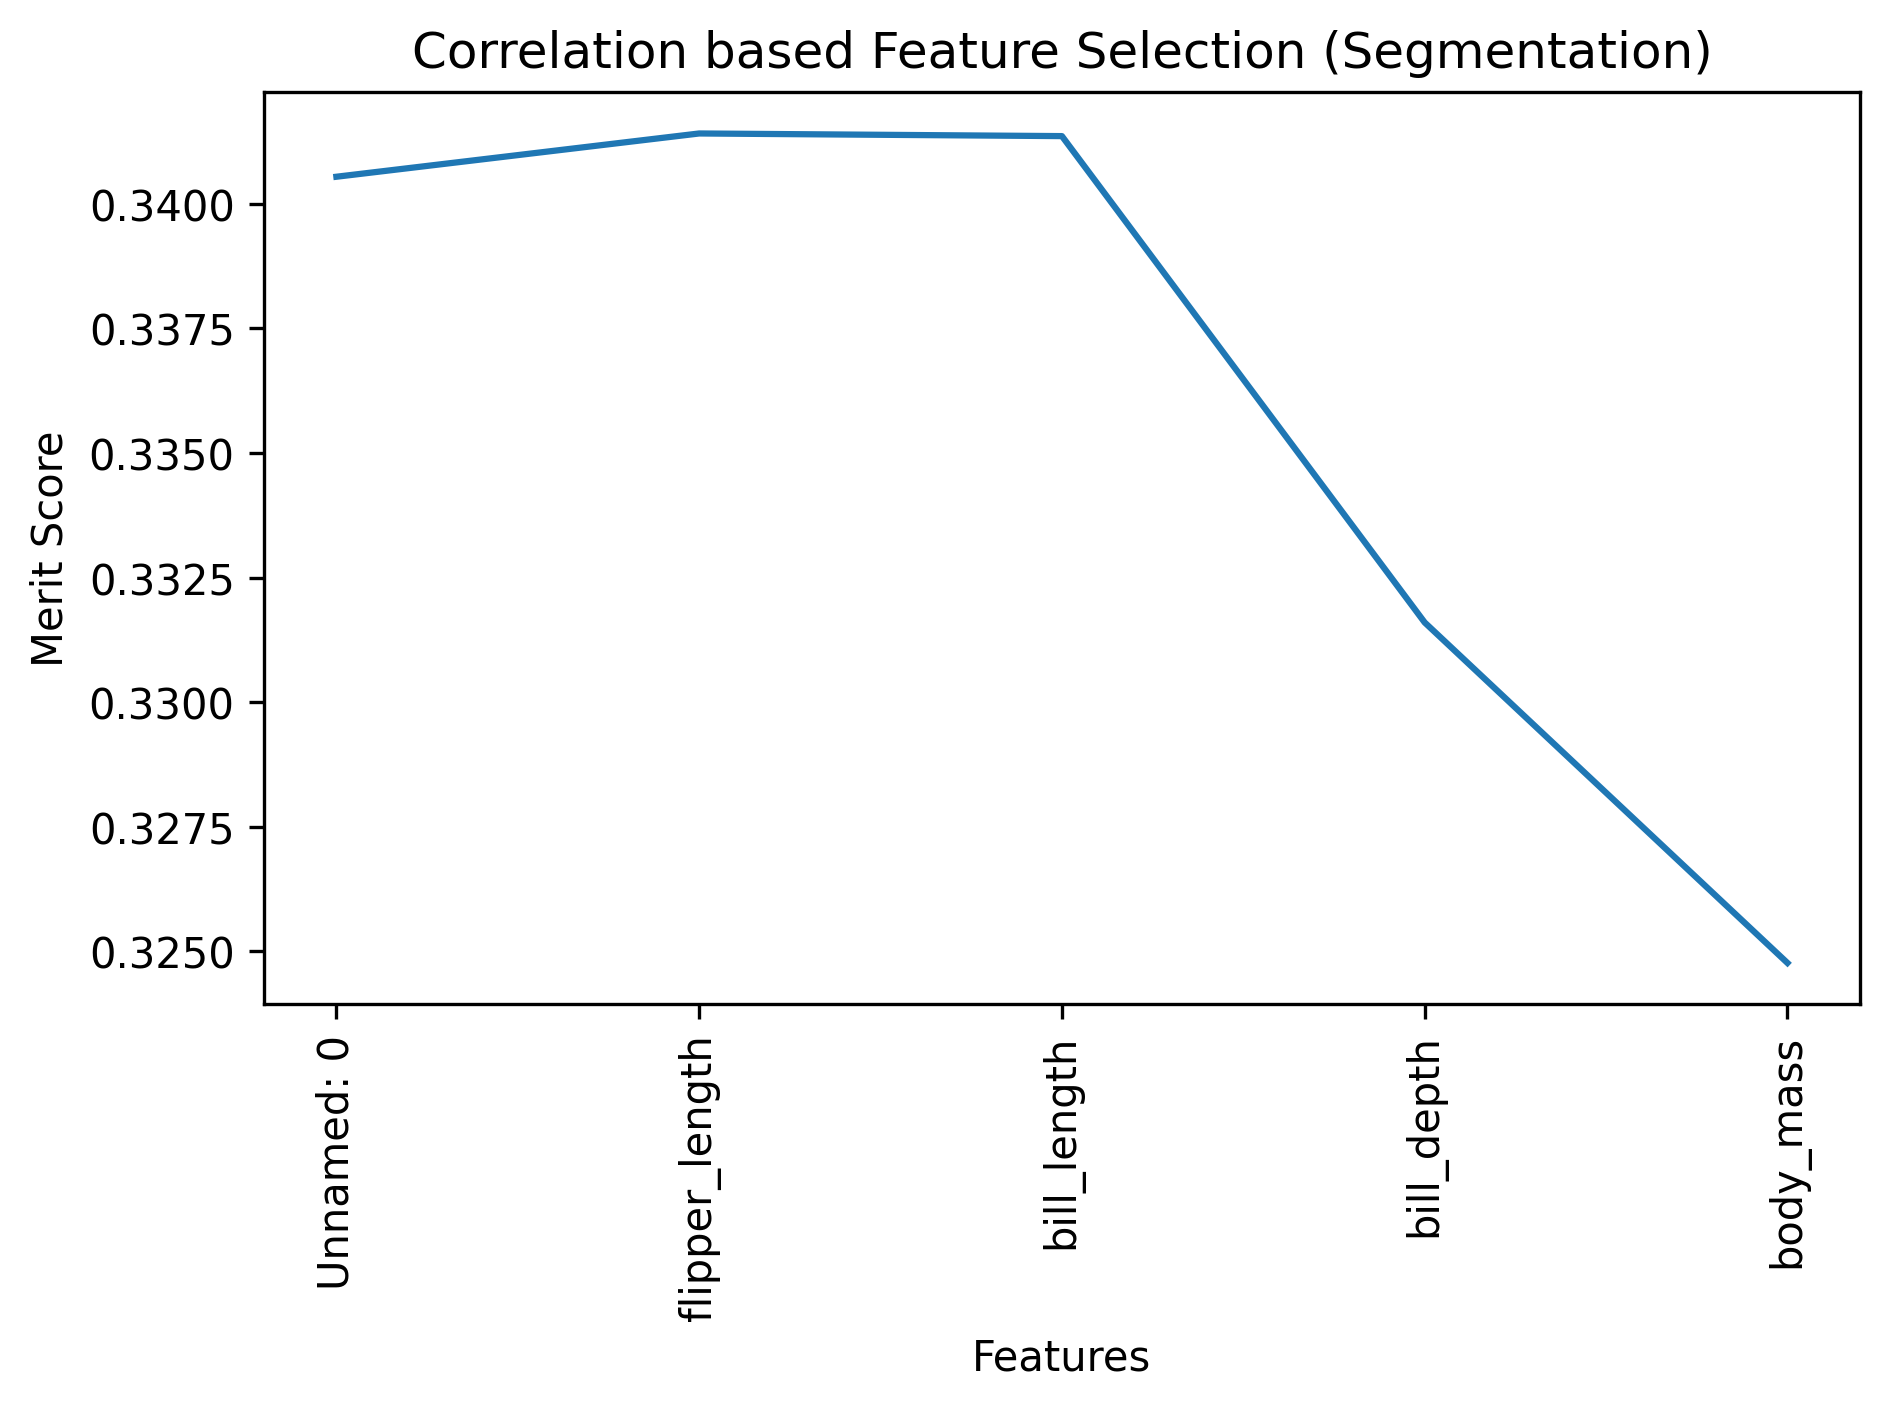

In [ ]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Segmentation)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

Hasil plot diatas memberikan gambaran tentang seberapa baik merit score meningkat saat fitur-fitur yang dianggap penting ditambahkan ke dalam model. Semakin tinggi merit score, semakin baik fitur-fitur tersebut dalam mempengaruhi output model, menunjukkan kontribusi fitur-fitur terhadap model kNN yang dilatih.

### Evaluate on test data

In [ ]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 1.000
Hold Out testing selected features: 1.000


### Plot Results

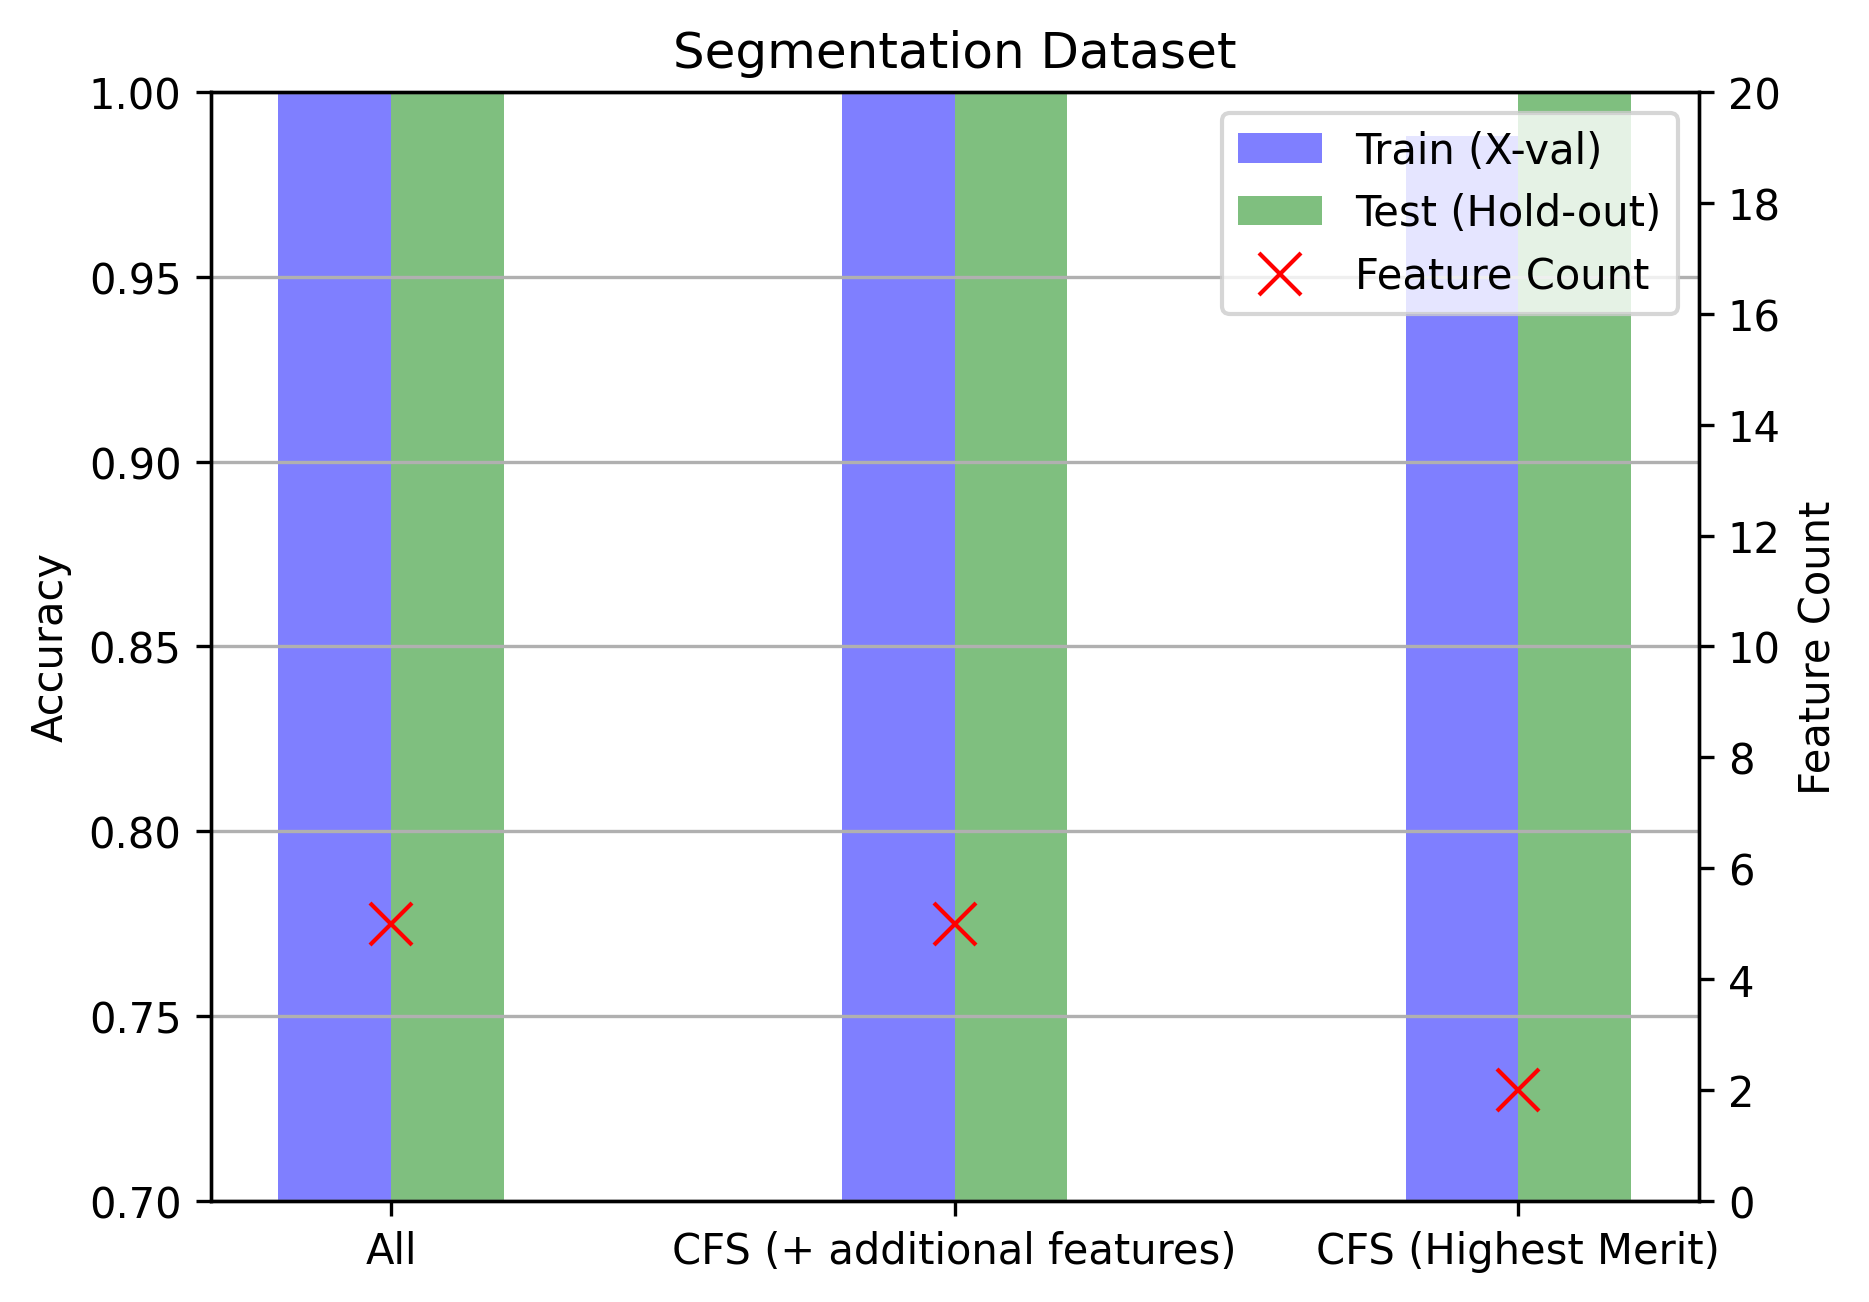

In [ ]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Segmentation Dataset")
plt.show()

Dalam grafik ini, dua metrik kinerja model, yaitu akurasi pada data latih (Train) dan akurasi pada data uji (Test), direpresentasikan menggunakan batang berwarna biru (Train) dan hijau (Test).
Dapat dilihat bahwa performa model pada data latih dan uji paling tinggi saat menggunakan metode CFS (Highest Merit), diikuti oleh CFS (+ additional features), dan yang terendah adalah model dengan semua fitur (All).
Garis merah menunjukkan jumlah fitur yang digunakan oleh masing-masing metode pemilihan fitur. Dapat dilihat bahwa jumlah fitur yang dipilih oleh CFS (Highest Merit) paling sedikit, diikuti oleh CFS (+ additional features), dan jumlah fitur terbanyak ada pada model dengan semua fitur (All).

**Kesimpulan:** Kualitas fitur jauh lebih penting daripada kuantitasnya dalam pemilihan fitur untuk model kNN. Metode CFS (Highest Merit) menonjol sebagai pilihan terbaik karena memilih fitur dengan merit score tertinggi, menghasilkan akurasi tertinggi pada kedua dataset latih dan uji. Pentingnya memilih dengan cermat fitur-fitur yang memiliki dampak besar pada hasil prediksi menjadi inti dari kesimpulan ini. Menggunakan metode pemilihan fitur yang cerdas memungkinkan model kNN untuk memanfaatkan informasi yang relevan, meningkatkan akurasi, dan menghasilkan prediksi yang dapat diandalkan pada data baru.
**Analisis:** Dengan memahami peran merit score dan memilih fitur secara cerdas, kita dapat membangun model kNN yang lebih akurat dan efisien. Penggunaan metode pemilihan fitur yang tepat memungkinkan model memanfaatkan fitur-fitur yang paling relevan, meningkatkan akurasi, dan menghasilkan prediksi yang dapat diandalkan pada data baru, sementara juga mengurangi kompleksitas dan menghindari overfitting.

**d). Dengan dataset Segmentasi gunakan model decison tree. Kemudian rangkum hasil dan lakukan analisis!.**

In [ ]:
seg_df = pd.read_csv("/content/segmentation-all.csv")

feature_names = seg_df.columns
print(seg_df.shape)
seg_df.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
seg_df["Class"].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [ ]:
y = seg_df.pop("Class").values
X = seg_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       random_state = 1, test_size = 1/2)

reature_names = seg_df.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [ ]:
ftree = DecisionTreeClassifier(criterion = "entropy")
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f"%(acc))

Test set accuract 0.96


[Text(0.7690217391304348, 0.9583333333333334, 'REGION-CENTROID-COL <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.6076086956521739, 0.875, 'INTENSITY-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.38913043478260867, 0.7916666666666666, 'SATURATION-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.13478260869565217, 0.7083333333333334, 'SATURATION-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.05217391304347826, 0.625, 'VALUE-MEAN <= 0.478\n82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.034782608695652174, 0.5416666666666666, 'SHORT-LINE-DENSITY-2 <= 3.917\n3\n[0, 1, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.017391304347826087, 0.4583333333333333, '2\n[0, 0, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.05217391304347826, 0.4583333333333333, '1\n[0, 1, 0, 0, 0, 0, 0]\nSKY'),
 Text(0.06956521739130435, 0.5416666666666666, '79\n[0, 0, 79, 0, 0, 0, 0]\nFOLIAGE'),
 Text(0.21739130434782608, 0.625, 'INTENSITY-MEAN <= 2.611\n226\

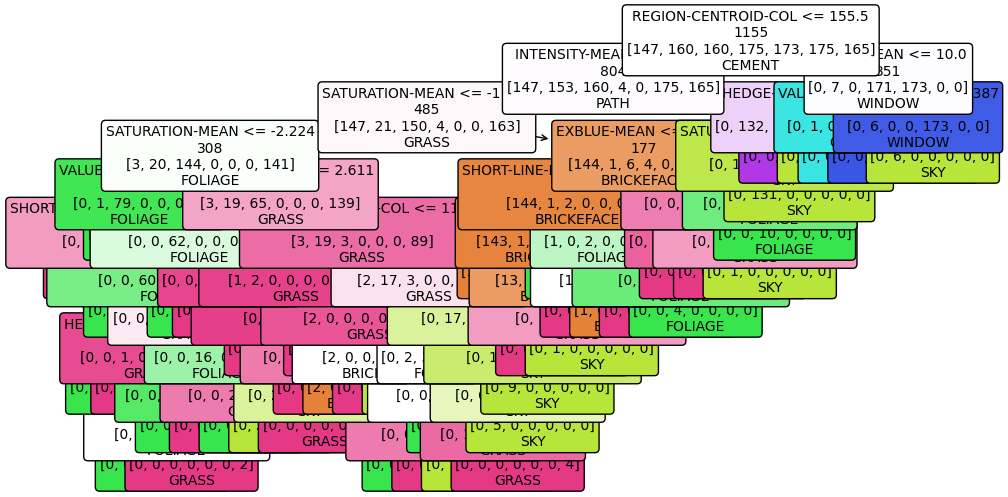

In [ ]:
plt.figure(figsize = (11, 6))

tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
                      class_names = ["BRICKEFACE", "SKY", "FOLIAGE", "CEMENT", "WINDOW", "PATH", "GRASS"],
                      label = "none", filled = True, impurity = False,
               rounded = True)

Hasil plot diatas adalah visualisasi dari pohon keputusan yang digunakan untuk melakukan klasifikasi. Pohon ini memberikan gambaran tentang aturan keputusan yang digunakan oleh model dalam memprediksi kategori target (kelas) dari data. Setiap node di pohon menggambarkan kondisi atau fitur yang digunakan untuk membuat keputusan, dan cabang-cabangnya menunjukkan hasil dari keputusan tersebut. Plot ini membantu untuk memahami cara model membuat prediksi berdasarkan fitur-fitur dari data yang diberikan.

In [ ]:
fi = ftree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
    print(" %4.2f  %s" %(fi_val, f_name))

 0.01  Class
 0.31  REGION-CENTROID-COL
 0.00  REGION-CENTROID-ROW
 0.00  REGION-PIXEL-COUNT
 0.00  SHORT-LINE-DENSITY-5
 0.01  SHORT-LINE-DENSITY-2
 0.00  VEDGE-MEAN
 0.00  VEDGE-SD
 0.01  HEDGE-MEAN
 0.10  HEDGE-SD
 0.22  INTENSITY-MEAN
 0.00  RAWRED-MEAN
 0.00  RAWBLUE-MEAN
 0.00  RAWGREEN-MEAN
 0.11  EXRED-MEAN
 0.04  EXBLUE-MEAN
 0.00  EXGREEN-MEAN
 0.02  VALUE-MEAN
 0.16  SATURATION-MEAN


In [ ]:
ftree.get_n_leaves()

49

In [ ]:
p_tree = DecisionTreeClassifier(criterion ="entropy", max_leaf_nodes = 8)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred, y_test)

print("Test set accuracy %4.2f" % (acc))

Test set accuracy 0.89


[Text(0.6607142857142857, 0.9, 'REGION-CENTROID-COL <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.4642857142857143, 0.7, 'INTENSITY-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.2857142857142857, 0.5, 'SATURATION-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.14285714285714285, 0.3, 'SATURATION-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.07142857142857142, 0.1, '82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.21428571428571427, 0.1, '226\n[3, 19, 65, 0, 0, 0, 139]\nGRASS'),
 Text(0.42857142857142855, 0.3, 'EXBLUE-MEAN <= -4.944\n177\n[144, 1, 6, 4, 0, 0, 22]\nBRICKEFACE'),
 Text(0.35714285714285715, 0.1, '150\n[144, 1, 2, 0, 0, 0, 3]\nBRICKEFACE'),
 Text(0.5, 0.1, '27\n[0, 0, 4, 4, 0, 0, 19]\nGRASS'),
 Text(0.6428571428571429, 0.5, 'HEDGE-SD <= 82.981\n319\n[0, 132, 10, 0, 0, 175, 2]\nPATH'),
 Text(0.5714285714285714, 0.3, '144\n[0, 132, 10, 0, 0, 0, 2]\nSKY'),
 Text(0.7142857142857143, 0.3, '1

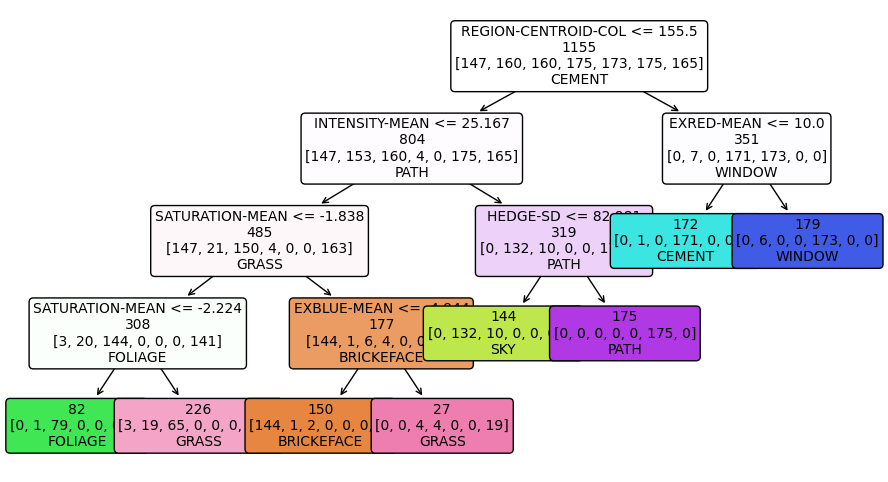

In [ ]:
plt.figure(figsize = (11, 6))

tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
                      class_names = ["BRICKEFACE", "SKY", "FOLIAGE", "CEMENT", "WINDOW", "PATH", "GRASS"],
                      label = "none", filled = True, impurity = False,
               rounded = True)

Menggunakan parameter max_leaf_nodes membuat analisis menjadi lebih mudah karena dapat mengontrol jumlah simpul dalam model. Sebaliknya, jika semua variabel digunakan tanpa membatasi dengan max_leaf_nodes, hasil analisis akan menjadi kompleks dan sulit dimengerti. Pada contoh di atas, max_leaf_nodes=8 digunakan untuk memastikan hasil analisis terstruktur, memudahkan identifikasi variabel yang paling relevan atau signifikan dalam proses analisis.

In [ ]:
fi = p_tree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
        print(" %4.2f  %s" % (fi_val, f_name))

 0.00  Class
 0.35  REGION-CENTROID-COL
 0.00  REGION-CENTROID-ROW
 0.00  REGION-PIXEL-COUNT
 0.00  SHORT-LINE-DENSITY-5
 0.00  SHORT-LINE-DENSITY-2
 0.00  VEDGE-MEAN
 0.00  VEDGE-SD
 0.00  HEDGE-MEAN
 0.12  HEDGE-SD
 0.23  INTENSITY-MEAN
 0.00  RAWRED-MEAN
 0.00  RAWBLUE-MEAN
 0.00  RAWGREEN-MEAN
 0.13  EXRED-MEAN
 0.03  EXBLUE-MEAN
 0.00  EXGREEN-MEAN
 0.00  VALUE-MEAN
 0.15  SATURATION-MEAN


**Analisis :** penggunaan pohon keputusan dalam model pembelajaran mesin membutuhkan pemahaman yang mendalam tentang bagaimana model bekerja dan cara mengelola kompleksitasnya. Melalui visualisasi, pengaturan parameter yang bijaksana, dan pemahaman tentang peran setiap elemen dalam pohon keputusan, kita dapat membangun model yang lebih interpretable, mudah dimengerti, dan dapat diandalkan dalam membuat prediksi pada data baru.

**Kesimpulan:** Visualisasi pohon keputusan merupakan representasi grafis dari aturan keputusan yang digunakan oleh model untuk melakukan klasifikasi. Setiap node di pohon menggambarkan kondisi atau fitur yang digunakan untuk membuat keputusan, dan cabang-cabangnya menunjukkan hasil dari keputusan tersebut. Penggunaan parameter max_leaf_nodes memungkinkan kontrol terhadap jumlah simpul dalam model, yang pada gilirannya mempengaruhi kompleksitas pohon keputusan.

**e). Carilah dataset selain dataset yang digunakan dalam praktikum ini kemudian gunakan metode Permutation Feature Importance dan Wrapper. Rangkum hasil, analisis, dan berikan kesimpulan !**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

In [ ]:
fish_df = pd.read_csv("/content/Fish.csv")

feature_names = fish_df.columns
print(fish_df.shape)
fish_df.head()

(159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Permutation Feature Importance Method
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
#Wrapper Method
rf_classifier_rfe = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_classifier_rfe, n_features_to_select=2)

In [ ]:
rfe.fit(X_train, y_train)
selected_features = np.where(rfe.support_)[0]

In [ ]:
rf_classifier_rfe.fit(X_train[:, selected_features], y_train)
y_pred_rfe = rf_classifier_rfe.predict(X_test[:, selected_features])
rfe_accuracy = accuracy_score(y_test, y_pred_rfe)

In [ ]:
print("Baseline Accuracy:", baseline_accuracy)
print("Permutation Feature Importance:")
for i, imp in enumerate(perm_importance.importances_mean):
    print(f"Feature {i}: {imp}")
print("Wrapper (RFE) Accuracy:", rfe_accuracy)
print("Selected Features:", selected_features)

Baseline Accuracy: 0.9805194805194806
Permutation Feature Importance:
Feature 0: 0.012481962481962535
Feature 1: 0.16053391053391058
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.0
Feature 5: -0.0038239538239537925
Feature 6: -0.004401154401154365
Feature 7: -0.006637806637806583
Feature 8: -0.0022366522366522182
Feature 9: -0.003751803751803721
Feature 10: 0.0021645021645022243
Feature 11: -0.0015873015873015743
Feature 12: -0.003896103896103864
Feature 13: 0.0005772005772006132
Feature 14: -0.00036075036075035777
Feature 15: -0.0009379509379508858
Feature 16: 0.0
Feature 17: 0.0005772005772006169
Feature 18: 0.060966810966811016
Wrapper (RFE) Accuracy: 0.8766233766233766
Selected Features: [10 18]


**Analisis:**
Dalam contoh kode di atas, kita memanfaatkan model pembelajaran mesin RandomForestClassifier menggunakan dataset yang telah diimpor. Dataset ini dibagi menjadi data pelatihan dan pengujian. Kita melaksanakan analisis Permutation Feature Importance untuk menilai tingkat kepentingan setiap fitur terhadap akurasi model. Selain itu juga menjalankan analisis Wrapper (RFE) untuk memilih dua fitur terbaik dari dataset ini.

**Kesimpulan:**
Dengan menggunakan metode Permutation Feature Importance, kita dapat mengukur sejauh mana pentingnya masing-masing fitur terhadap performa model. Sementara itu, melalui metode Wrapper (RFE), kita dapat memilih subset terbaik dari fitur-fitur ini untuk meningkatkan atau menjaga kinerja model. Itulah kesimpulan yang dapat diambil dari hasil kode tersebut.